In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/Krish/PROJECTS AND FILES/DATA_SETS/sales_data_uk.csv",encoding = 'unicode_escape')

In [13]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,YEAR
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2011


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
 9   YEAR         406829 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 32.6+ MB


In [6]:
#separating year fromthe dATE TIME COLUMN
yr = {
    'col' : list(data['InvoiceDate'])
}
dfy = pd.DataFrame(yr)
dfy['col'] = pd.to_datetime(dfy['col'])
dfy['year'] = dfy['col'].dt.year
dfy

,col,year
0,2010-12-01 08:26:00,2010
1,2010-12-01 08:26:00,2010
2,2010-12-01 08:26:00,2010
3,2010-12-01 08:26:00,2010
4,2010-12-01 08:26:00,2010
...,...,...
541904,2011-12-09 12:50:00,2011
541905,2011-12-09 12:50:00,2011
541906,2011-12-09 12:50:00,2011
541907,2011-12-09 12:50:00,2011


In [7]:
pd.isnull(dfy['year']).sum()

0

In [8]:
data['YEAR'] = dfy['year']

In [ ]:
data['Amount'] = data['UnitPrice'] * data['Quantity']

In [16]:
pd.isnull(data).sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Amount         0
YEAR           0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data["CustomerID"] = data["CustomerID"].astype(int)
data["CustomerID"] = data["CustomerID"].astype(str)

In [17]:
def ct(u,l,em):
    for x in u:
        p = l.count(x)
        em.append(p)

# DESCRIPTION

In [18]:
#DESCRIPTION VS COUNT
dc_un = data['Description'].unique()
dc_lt = list(data['Description'])
em = []
ds_ct = ct(dc_un,dc_lt,em)


In [19]:
#making data frame for the selected data in previous coloumn
DATA2 = pd.DataFrame(dc_un,columns=['D'])
DATA2['V'] = em
DATA2 = DATA2.sort_values(by ='V',ascending= False)

In [20]:
DATA2

,D,V
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
533,REGENCY CAKESTAND 3 TIER,1905
140,JUMBO BAG RED RETROSPOT,1662
9,ASSORTED COLOUR BIRD ORNAMENT,1418
1398,PARTY BUNTING,1416
...,...,...
3289,ANTIQUE RASPBERRY FLOWER EARRINGS,1
3736,"WALL ART,ONLY ONE PERSON",1
3292,GOLD/AMBER DROP EARRINGS W LEAF,1
2655,INCENSE BAZAAR PEACH,1


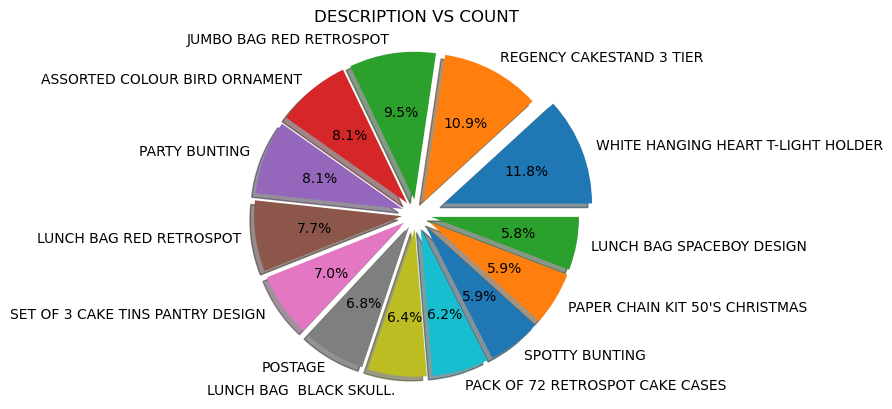

In [21]:
##DESCRIPTION VS COUNT (plot)
plt.pie(x=DATA2['V'].head(13),labels = DATA2['D'].head(13),autopct = '%1.1f%%',explode=[0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],shadow=True)
plt.title('DESCRIPTION VS COUNT')
plt.show()

the most of the repetetive orders are for WHITE HANGING HEART T-LIGHT HOLDER followed by REGENCY CAKE STAND 3 TIER & JUMBO BAG RED RETROSPORT

In [22]:
#DESCRIPTION  VS  QUANTITY
dc_q = data.groupby(['Description'],as_index = False)['Quantity'].sum().sort_values(by = "Quantity",ascending = False).head(13)

In [23]:
dc_q

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


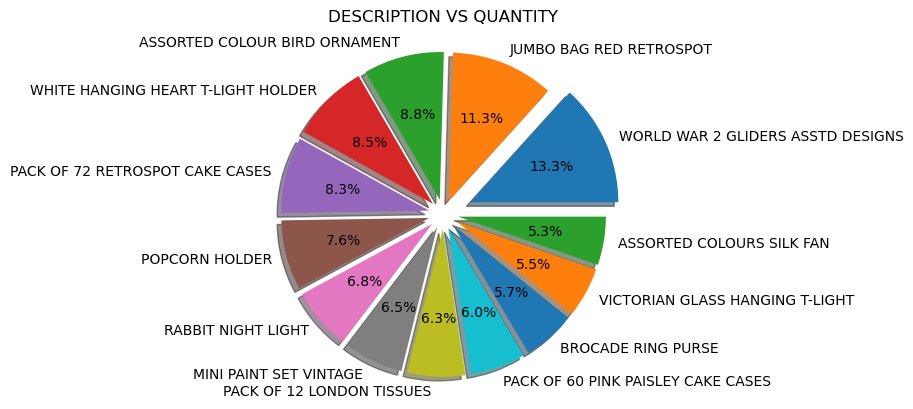

In [24]:
#DESCRIPTION  VS  QUANTITY (plot)
plt.pie(x=dc_q['Quantity'],labels = dc_q['Description'],autopct = '%1.1f%%',explode=[0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],shadow=True)
plt.title("DESCRIPTION VS QUANTITY")
plt.show()

the total quantity ordered for the products is:
---------- highest for WORLD WAR 2 GLIDERS ASSTD DESIGNS
---------- whereas the 2nd highest is for JUMBO RED RETROSPORT (indicating that this product is ordered in a good amount and as well as with multiple repetetion )
---------- the HIGHEST REPEATED "WHITE HANGING HEART T-LIGHT HOLDER" seems to be lesser in total quality than expected based on the repetetive ordres for it

In [25]:
#DESCRIPTION VS AMOUNT
dc_am = data.groupby(['Description'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(13)

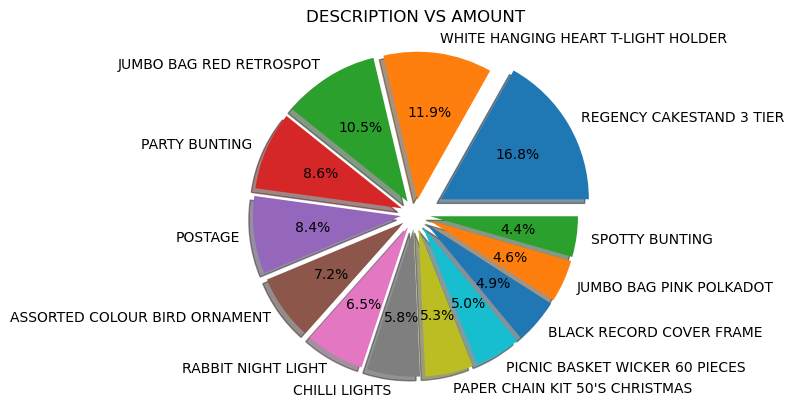

In [26]:
#DESCRIPTION VS AMOUNT (plot)
plt.pie(x=dc_am['Amount'],labels = dc_am['Description'],autopct = '%1.1f%%',explode=[0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],shadow=True)
plt.title("DESCRIPTION VS AMOUNT")
plt.show()

from above grapg :
-------------the most amount spent was on REGENCY CAKESTAND 3 TIER followed by WHITE HANGING HEART T-LIGHT HOLDER and JUMBO BAG RED RETROSPORT
-------------the diffrence in the amount spent and quantity purchased is due to the diffrences in the unit prices

In [27]:
#DECRIPTION VS UNIT PRICE & AMOUNT
dc_un_am = data.groupby(['Description','UnitPrice'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(13)

In [28]:
dc_un_am.drop(5774,inplace=True)


In [35]:
dc_un_am

,Description,UnitPrice,Amount,Quantity
6651,REGENCY CAKESTAND 3 TIER,10.95,85,7.830
6652,REGENCY CAKESTAND 3 TIER,12.75,46,3.650
8807,WHITE HANGING HEART T-LIGHT HOLDER,2.55,44,17.514
442,ASSORTED COLOUR BIRD ORNAMENT,1.69,37,22.058
6250,POSTAGE,18.00,35,1.991
6366,RABBIT NIGHT LIGHT,1.79,35,19.905
774,BLACK RECORD COVER FRAME,3.39,35,10.369
5656,PARTY BUNTING,4.95,33,6.764
4087,JUMBO BAG RED RETROSPOT,1.79,33,18.526
8808,WHITE HANGING HEART T-LIGHT HOLDER,2.95,31,10.575


In [30]:
dc_un_am['Quantity'] = dc_un_am['Amount']/dc_un_am['UnitPrice']

In [32]:
dc_un_am['Quantity'] = dc_un_am['Quantity']/1000

In [33]:
dc_un_am['Amount'] = dc_un_am['Amount']/1000

In [34]:
dc_un_am['Amount'] = dc_un_am['Amount'].astype('int64')

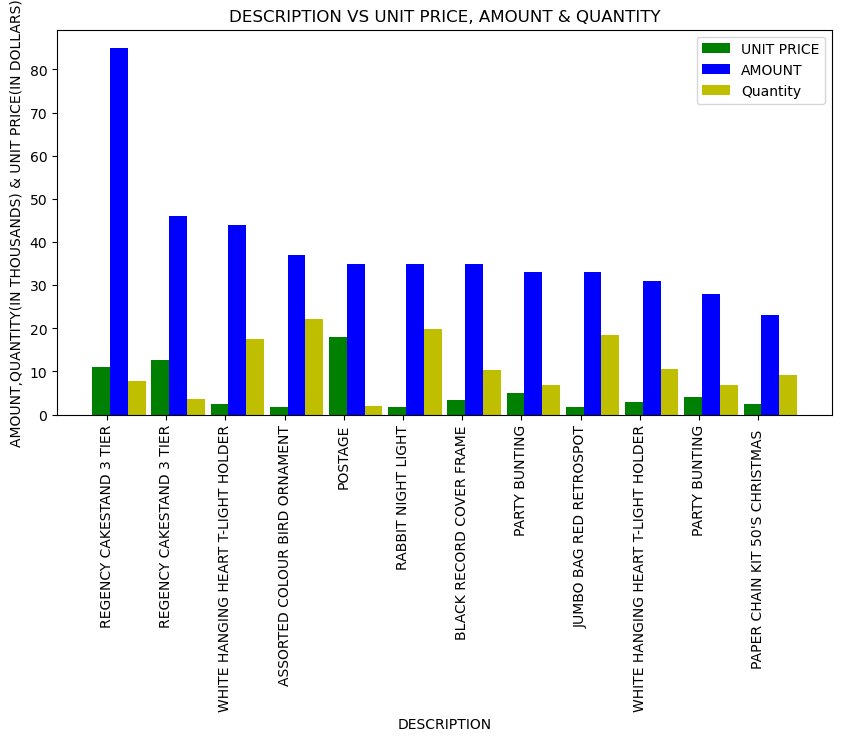

In [91]:
#DECRIPTION VS UNIT PRICE & AMOUNT,QUANTITY (PLOT)
bar_width = 0.3
y1 = dc_un_am['UnitPrice']
y2 = dc_un_am['Amount']
y3 = dc_un_am['Quantity']
r1 = np.arange(len(dc_un_am['Description']))
r2 = [x + bar_width for x in r1]
r3 = [x1 + bar_width for x1 in r2]
plt.figure(figsize = (10,5))
plt.bar(r1,y1,width=bar_width,color = 'g',align = 'center',linewidth  = 100)
plt.bar(r2,y2,width=bar_width,color='b')
plt.bar(r3,y3,width=bar_width,color='y')
plt.xticks([r + bar_width/3 for r in range(len(dc_un_am['Description']))],dc_un_am['Description'],rotation = 90)
plt.xlabel('DESCRIPTION')
plt.ylabel("AMOUNT,QUANTITY(IN THOUSANDS) & UNIT PRICE(IN DOLLARS)")
plt.title('DESCRIPTION VS UNIT PRICE, AMOUNT & QUANTITY')
plt.legend(labels=['UNIT PRICE',"AMOUNT","Quantity"])
plt.show()

-----unit price and quantity are inversly proportional 
-----highest amount is for REGENCY CAKE STAND 3-TIER followeds by the same category but at diffrent unit price 


# DATE

In [37]:
# DATE VS AMOUNT
dt_am = data.groupby(['YEAR'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(13)

In [38]:
dt_am['Amount']=dt_am['Amount']/100000
dt_am

,YEAR,Amount
1,2011,77.454618
0,2010,5.546040


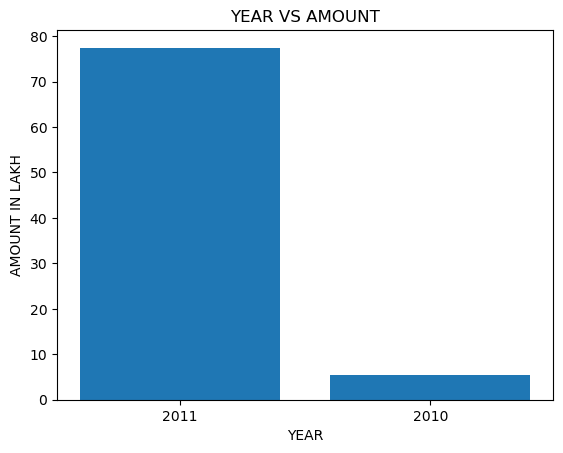

In [39]:
# YEAR VS AMOUNT(plot)
x = ['2011','2010']
y = dt_am['Amount']
plt.bar(x,y)
plt.xlabel("YEAR")
plt.ylabel("AMOUNT IN LAKH")
plt.title("YEAR VS AMOUNT")
plt.show()

the data only consists of sales of 1 month of 2010 which is not legit to compare it with the 2011 sales data which isof 9 months...................

# CUSTOMER ID

In [41]:
#cust_id vs amount and country
cust_amt_cnt = data.groupby(['CustomerID','Country'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(13)

In [42]:
cust_amt_cnt

,CustomerID,Country,Amount
1711,14646,Netherlands,279489.02
4241,18102,United Kingdom,256438.49
3766,17450,United Kingdom,187482.17
1903,14911,EIRE,132572.62
57,12415,Australia,123725.45
1353,14156,EIRE,113384.14
3809,17511,United Kingdom,88125.38
3210,16684,United Kingdom,65892.08
1013,13694,United Kingdom,62653.10
2200,15311,United Kingdom,59419.34


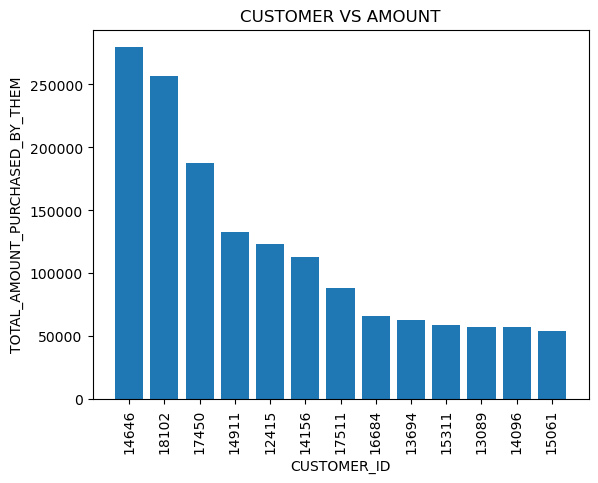

In [43]:
#customer id vs amount (plot)
plt.bar(cust_amt_cnt["CustomerID"],cust_amt_cnt["Amount"])
plt.xticks(rotation=90)
plt.xlabel("CUSTOMER_ID")
plt.ylabel("TOTAL_AMOUNT_PURCHASED_BY_THEM")
plt.title("CUSTOMER VS AMOUNT")
plt.show()

the customer with id : 14646 is the highest amount giving person followed by 18102, 17450 and 14911

In [44]:
#country vs quantity
cust_country_quan = data.groupby(['CustomerID','Country'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(13)

In [45]:
cust_country_quan

,CustomerID,Country,Quantity
1711,14646,Netherlands,196719
57,12415,Australia,77242
1903,14911,EIRE,77180
3766,17450,United Kingdom,69029
4241,18102,United Kingdom,64122
3809,17511,United Kingdom,63012
1013,13694,United Kingdom,61803
1455,14298,United Kingdom,58021
1353,14156,EIRE,57025
3210,16684,United Kingdom,49390


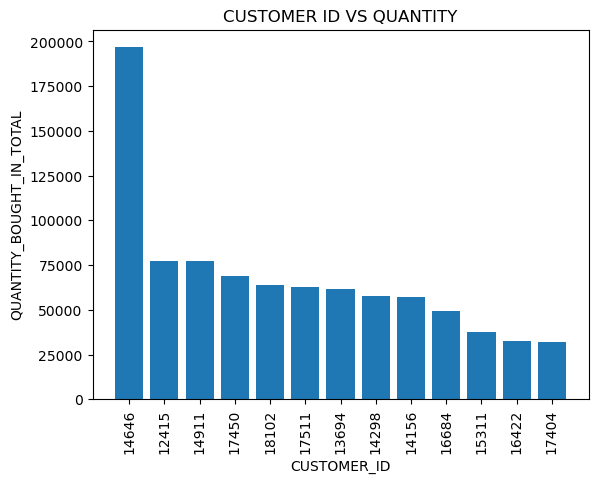

In [46]:
#customer id vs quantity (plot)
plt.bar(cust_country_quan['CustomerID'],cust_country_quan['Quantity'])
plt.xticks(rotation = 90)
plt.xlabel("CUSTOMER_ID")
plt.ylabel("QUANTITY_BOUGHT_IN_TOTAL")
plt.title("CUSTOMER ID VS QUANTITY")
plt.show()

the customer with id : 14646 is the most valuable person with highest amount as well quantity of purchase
the customer with id : 12415, 14911, 17450 are valuable to be loooked for maintaining the stocks 
the customer with id :18102, 17450,14911 are valuable to be looked for amount purchased and maintaing a profitable relationship

# COUNTRY

In [47]:
#country vs amount
cun_amt = data.groupby(["Country"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
cun_amt["Amount"]=cun_amt["Amount"]/100000
cun_amt

,Country,Amount
35,United Kingdom,67.678734
23,Netherlands,2.846615
10,EIRE,2.502852
14,Germany,2.216982
13,France,1.967128
0,Australia,1.370773
32,Switzerland,0.557394
30,Spain,0.547746
3,Belgium,0.409110
31,Sweden,0.365959


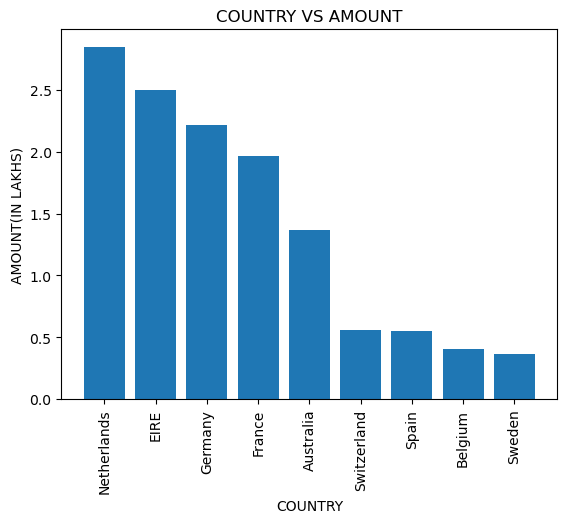

In [48]:
#country vs amount (plot)
plt.bar(cun_amt["Country"][1:],cun_amt["Amount"][1:])
plt.xticks(rotation= 90)
plt.xlabel("COUNTRY")
plt.ylabel("AMOUNT(IN LAKHS)")
plt.title("COUNTRY VS AMOUNT")
plt.show()

In [75]:
#country : domestic vs foreign for amount
cun_dom_for = data.groupby(["Country"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
lt_amt = list(cun_dom_for["Amount"])

#as i made the grouby data frameto know the value of the amount vs country, hence it has to be made manually to calculate the foreign sum amount

foreign_sum=0
for x in range(1,(len(cun_dom_for["Amount"]+1))):
    foreign_sum = foreign_sum + lt_amt[x]

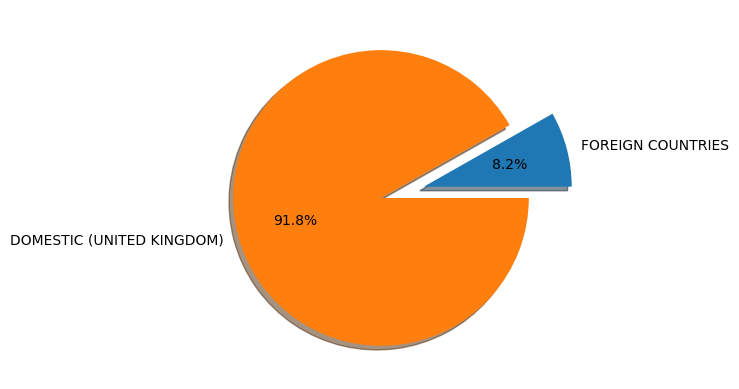

In [67]:
#country : domestic vs foreign (plot)
plt.pie(x=[cun_dom_for["Amount"][0],foreign_sum],labels = ["FOREIGN COUNTRIES","DOMESTIC (UNITED KINGDOM)"],autopct="%1.1f%%",shadow=True,explode=[0.2,0.1])
plt.show()

In [1]:
#country vs quantity
cun_qt = data.groupby(["Country"],as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False).head(10)

cun_qt["Quantity"] = cun_qt["Quantity"]/100000
cun_qt

NameError: name 'data' is not defined

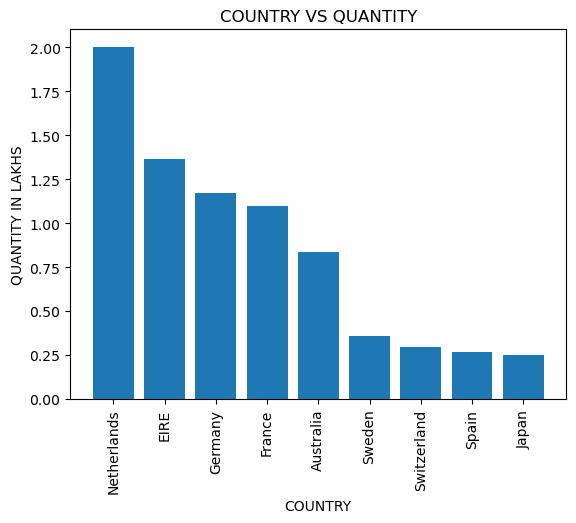

In [63]:
#country vs quantity
plt.bar(cun_qt["Country"][1:],cun_qt["Quantity"][1:])
plt.xticks(rotation=90)
plt.xlabel("COUNTRY")
plt.ylabel("QUANTITY IN LAKHS")
plt.title("COUNTRY VS QUANTITY")
plt.show()

In [80]:
#country : domestic vs foreign (quantity)
cun_dom_for_quan = data.groupby(["Country"],as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False)
lt_quan = list(cun_dom_for_quan["Quantity"])

for_sum=0
for x in range(1,(len(cun_dom_for_quan["Quantity"]+1))):
    for_sum = for_sum + lt_quan[x]


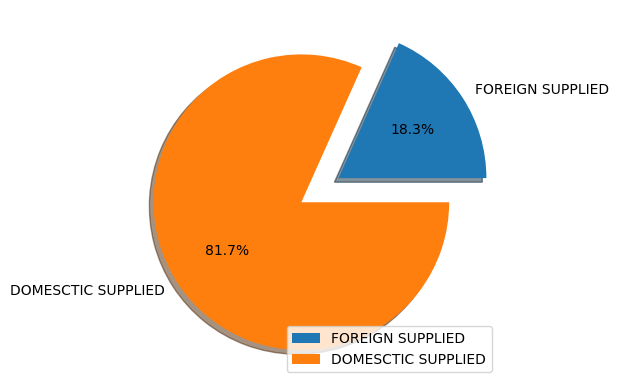

In [89]:
#country : domestic vs foreign (quantity) (plot)
plt.pie(x=[for_sum,lt_quan[0]],labels=["FOREIGN SUPPLIED","DOMESCTIC SUPPLIED"],autopct="%1.1f%%",shadow=True,explode=[0.2,0.1])
plt.legend(loc='lower right')
plt.show()

# CONCLUSIONS

	Customers ( 14646, 17450,18102, 12415, 14911) from UK, NETHERLANDS, EIRE & AUSTRALIA are highly interested in buying below mentioned products: -
	WORLD WAR 2 GLIDERS ASSTD DESIGN.
	JUMBO BAG RED RETRO SPOT.
	ASSORTED COLOR BIRD ORNAMENT.
	WHITE HANGING HEART T-LIGHT HOLDER.
        Giving surplus amount of transaction and supplies.

	Any hike in the price of products having UNIT PRICE above 5$ is disliked, while there can be a slight increase in the prices of the products having UNIT PRICE around 1, 2 & 3 $.

	The business seems to be well settled in the domestic country (United Kingdom) but needs to be focused on the foreign country exports and business. This can be done making new customers having good impact in the society by fortune and by respect.
